<a href="https://colab.research.google.com/github/jasgunchandnani/BritishAirlinesProject/blob/main/Review%26Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import nltk

In [ ]:
# Download tokenizer data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Initialize the variables and lists
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100
reviews = []

# Loop through each page to scrape the reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create the URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Find all the review paragraphs and add to the reviews list
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"  ---> {len(reviews)} total reviews")


Scraping page 1
  ---> 100 total reviews
Scraping page 2
  ---> 200 total reviews
Scraping page 3
  ---> 300 total reviews
Scraping page 4
  ---> 400 total reviews
Scraping page 5
  ---> 500 total reviews
Scraping page 6
  ---> 600 total reviews
Scraping page 7
  ---> 700 total reviews
Scraping page 8
  ---> 800 total reviews
Scraping page 9
  ---> 900 total reviews
Scraping page 10
  ---> 1000 total reviews
Scraping page 11
  ---> 1100 total reviews
Scraping page 12
  ---> 1200 total reviews
Scraping page 13
  ---> 1300 total reviews
Scraping page 14
  ---> 1400 total reviews
Scraping page 15
  ---> 1500 total reviews
Scraping page 16
  ---> 1600 total reviews
Scraping page 17
  ---> 1700 total reviews
Scraping page 18
  ---> 1800 total reviews
Scraping page 19
  ---> 1900 total reviews
Scraping page 20
  ---> 2000 total reviews
Scraping page 21
  ---> 2100 total reviews
Scraping page 22
  ---> 2200 total reviews
Scraping page 23
  ---> 2300 total reviews
Scraping page 24
  ---> 2400 

In [ ]:
# Create a DataFrame with the scraped reviews
df = pd.DataFrame()
df["reviews"] = reviews

In [ ]:
df.to_csv("BA_reviews.csv")


In [ ]:
reviews = pd.read_csv("BA_reviews.csv")
reviews = reviews.pop('reviews')
reviews

,reviews
0,✅ Trip Verified | My family and I were booke...
1,Not Verified | We had to change from AA to BA...
2,✅ Trip Verified | After paying $6500 for ticke...
3,✅ Trip Verified | An excellent flight on BA Ci...
4,✅ Trip Verified | Crew were amazing and atte...
...,...
3695,Flying from Aberdeen to Toronto via LHR. On bo...
3696,LGW-JER return. Out on B737 back on A319 both ...
3697,I flew AMS-LGW-MCO and JFK-LHR-AMS this month....
3698,London LHR to Hong Kong on 27 May. Was really ...


In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [ ]:
reviews = reviews.str.replace('Trip Verified |','')
reviews = reviews.str.replace('✅','')
reviews = reviews.str.replace('|','')
reviews = reviews.str.replace(r'\b(\w{1,3})\b','')
reviews = reviews.apply(remove_punctuations)
reviews

,reviews
0,My family and I were booked to leave Londo...
1,Not Verified We had to change from AA to BA ...
2,After paying 6500 for tickets for my family ...
3,An excellent flight on BA CityFlyer The plan...
4,Crew were amazing and attentive nothing wa...
...,...
3695,Flying from Aberdeen to Toronto via LHR On boa...
3696,LGWJER return Out on B737 back on A319 both fl...
3697,I flew AMSLGWMCO and JFKLHRAMS this month Over...
3698,London LHR to Hong Kong on 27 May Was really l...


In [ ]:
reviews.shape

(3700,)

In [ ]:
freq_words = pd.Series(''.join(reviews).lower().split()).value_counts()[:50]
freq_words

,count
the,30080
to,20126
and,18507
a,13667
was,13112
i,10950
of,8636
in,8512
on,7976
flight,6624


<ipython-input-11-8e434ae96a15>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  freq_words.plot.barh(x=freq_words[0], y=freq_words[1])


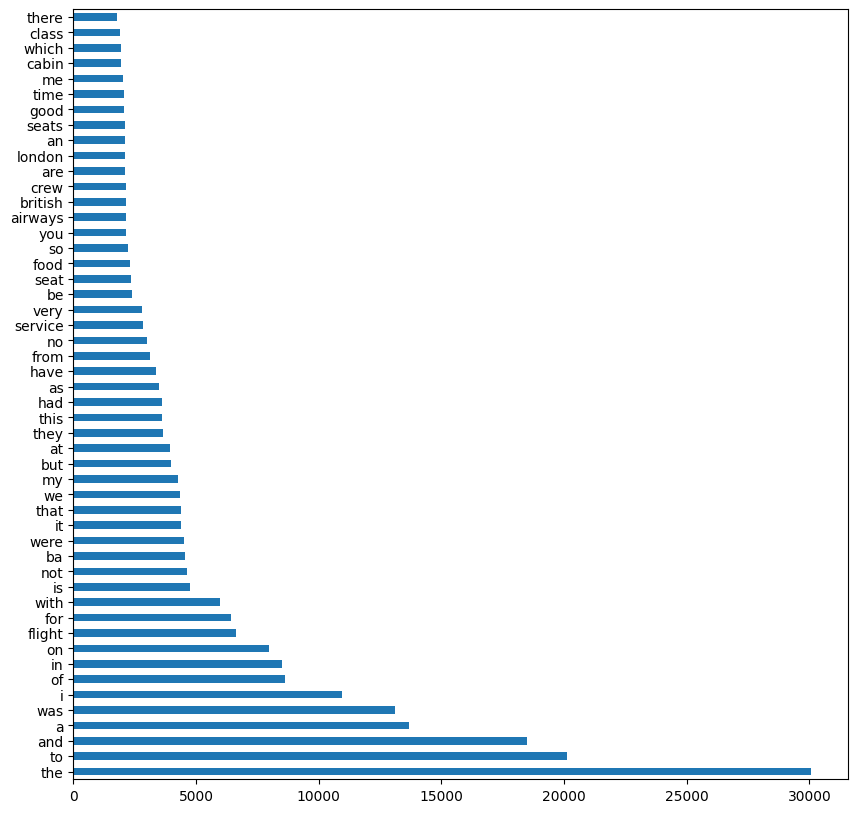

In [ ]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0], y=freq_words[1])
plt.show()

## text clustering

In [ ]:
categories = ['negative','positive']
num_cat = len(categories)
num_cat

2

In [ ]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')


In [ ]:
# Define a custom tokenizer function for TfidfVectorizer
def custom_tokenizer(text):
    return tokenizer.tokenize(text)

In [ ]:
# Vectorize documents using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), tokenizer=custom_tokenizer)


In [ ]:
# Fit and Transform Text Data
reviews_counts = tf_idf_vect.fit_transform(df['reviews'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Check the shape of the count vector
print(reviews_counts.shape)

(3700, 13885)


In [ ]:
# To see the top 50 words
freq_words = pd.Series(np.array(tf_idf_vect.get_feature_names_out())[reviews_counts.sum(axis=0).A1.argsort()[-50:][::-1]])
print(freq_words)

0          flight
1              ba
2         service
3            seat
4            good
5               t
6            food
7         british
8            crew
9         airways
10          seats
11          class
12         london
13           time
14          cabin
15       verified
16           trip
17       business
18          staff
19       heathrow
20        economy
21              s
22          check
23        flights
24         return
25           club
26            lhr
27          plane
28        airline
29          hours
30         lounge
31           just
32       boarding
33       aircraft
34     experience
35     passengers
36            new
37            fly
38            did
39           meal
40         review
41          great
42              2
43           hour
44    comfortable
45         drinks
46         really
47       airlines
48       customer
49        premium
dtype: object


In [ ]:
# import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data
kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_
pred_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[6.71091981e-04, 4.44322144e-03, 1.20859935e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.60330462e-05],
       [3.95656555e-04, 8.33804820e-04, 7.72910687e-04, ...,
        6.08546625e-05, 8.88193764e-05, 0.00000000e+00]])

In [ ]:
unique , counts = np.unique(pred_labels, return_counts=True)
dict(zip(unique, counts))

{0: 1444, 1: 2256}

In [ ]:
from sklearn import metrics

# Convert sparse matrix to dense array
reviews_counts_array = reviews_counts.toarray()

# Compute DBI (Davies-Bouldin Index) score
dbi = metrics.davies_bouldin_score(reviews_counts_array, pred_labels)

# Compute Silhouette Score
ss = metrics.silhouette_score(reviews_counts_array, pred_labels, metric='euclidean')

# Print the DBI and Silhouette Scores
print("DBI Score:", dbi)
print("Silhouette Score:", ss)


DBI Score: 12.444048839113863
Silhouette Score: 0.0065289147958826664


In [ ]:
# Create a DataFrame with the reviews and predicted labels
df_reviews = pd.DataFrame({'review': reviews, 'labels': pred_labels})

# Display the DataFrame
print(df_reviews)


                                                 review  labels
0         My family and I were booked to leave Londo...       0
1     Not Verified   We had to change from AA to BA ...       0
2       After paying 6500 for tickets for my family ...       0
3       An excellent flight on BA CityFlyer The plan...       1
4         Crew were amazing and attentive nothing wa...       1
...                                                 ...     ...
3695  Flying from Aberdeen to Toronto via LHR On boa...       1
3696  LGWJER return Out on B737 back on A319 both fl...       0
3697  I flew AMSLGWMCO and JFKLHRAMS this month Over...       1
3698  London LHR to Hong Kong on 27 May Was really l...       1
3699  Flew LHR to Larnaca and return 22nd April and ...       1

[3700 rows x 2 columns]


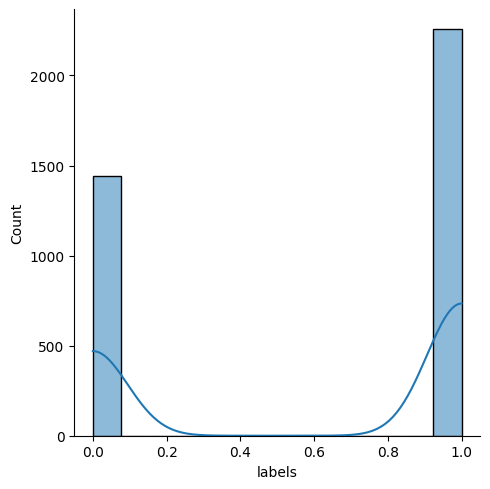

In [ ]:
sns.displot(df_reviews['labels'], kde = True)

In [ ]:
negative_review = df_reviews[df_reviews['labels']==1]
negative_review

,review,labels
3,An excellent flight on BA CityFlyer The plan...,1
4,Crew were amazing and attentive nothing wa...,1
13,Not Verified Singapore to Heathrow Business...,1
19,This is a route I fly regularly Used first c...,1
20,While BA may have made some positive improv...,1
...,...,...
3694,Flew from LHR to YYZ on 23 June on new 787 Not...,1
3695,Flying from Aberdeen to Toronto via LHR On boa...,1
3697,I flew AMSLGWMCO and JFKLHRAMS this month Over...,1
3698,London LHR to Hong Kong on 27 May Was really l...,1


In [ ]:
positive_review = df_reviews[df_reviews['labels']==0]
positive_review

,review,labels
0,My family and I were booked to leave Londo...,0
1,Not Verified We had to change from AA to BA ...,0
2,After paying 6500 for tickets for my family ...,0
5,Not Verified I flew internationally for the ...,0
6,BA after subsequent delays and postponed dep...,0
...,...,...
3667,Got a wonderful cheap fare from London City to...,0
3678,I flew with British Airways with my mother fro...,0
3684,I flew GlasgowGatwickVegasGatwickGlasgow I hav...,0
3688,Travelled from OZ to watch start of TDF in Lee...,0
